In [62]:
import numpy
import math
import scipy.linalg

def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

x = numpy.arange(0.0, 15.0, 0.1)
y = [f(xi) for xi in x]

values = list()

approximations = [
    [1, 15],
    [1, 8, 15],
    [1, 4, 10, 15],
]

for points in approximations:
    a = [
        [1, *(xi**k for k in range(1, len(points)))]
        for xi in points
    ]
    b = [f(xi) for xi in points]
    w = scipy.linalg.solve(a, b)
    print(w)
    def approx(x):
        return sum(
            w[k] * x**k
            for k in range(0, len(points))
        )
    y_approx = [approx(xi) for xi in x]
    values.append(y_approx)

[ 3.43914511 -0.18692825]
[ 3.32512949 -0.06531159 -0.00760104]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


<ipython-input-62-fbf166f5ed0f>:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return sum(


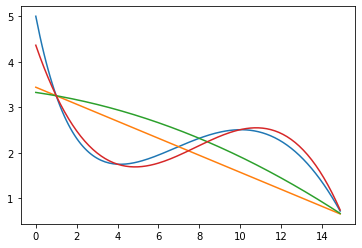

In [61]:
%matplotlib inline
plot(x, y, x, values[0], x, values[1], x, values[2])